In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression


In [84]:
# Dropping rows with NaN in "Total Square Feet" for 1-bedroom properties 
jamaicadf = pd.read_excel("rentalsJamaica.xlsx")

count      1509.000000
mean       2806.895295
std       24411.678166
min         500.000000
25%        1700.000000
50%        2188.000000
75%        2685.000000
max      950000.000000
Name: Price, dtype: float64

In [104]:
jamaicaOneBrnonan = jamaicadf[jamaicadf["Beds"] == 1].dropna(subset=["Total Square Feet"])
jamaicaOneBrnonan["Total Square Feet"].describe()
jamaicaOneBrnonan["Price"].describe()


count     384.000000
mean     2154.789062
std       412.077789
min       750.000000
25%      1901.500000
50%      2165.000000
75%      2427.750000
max      3406.000000
Name: Price, dtype: float64

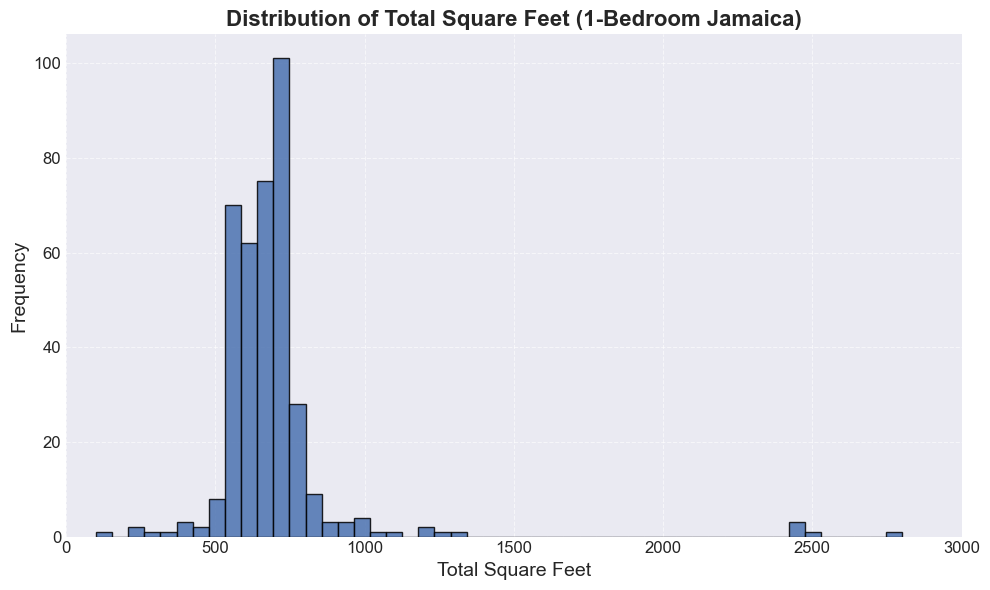

In [92]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaOneBrnonan["Total Square Feet"], bins=50, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, 3000)
ax.set_title("Distribution of Total Square Feet (1-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [93]:
nycdf = pd.read_excel("rentalsNYC.xlsx")

In [105]:
# Preprocessing Examine Missing Values
nycdfOneB = nycdf[nycdf["Beds"] == 1]
nycdfOneB["Total Square Feet"].describe()
nycdfOneB["Price"].describe()

count     1789.000000
mean      5220.825601
std       2079.782428
min        500.000000
25%       3800.000000
50%       4800.000000
75%       6000.000000
max      25000.000000
Name: Price, dtype: float64

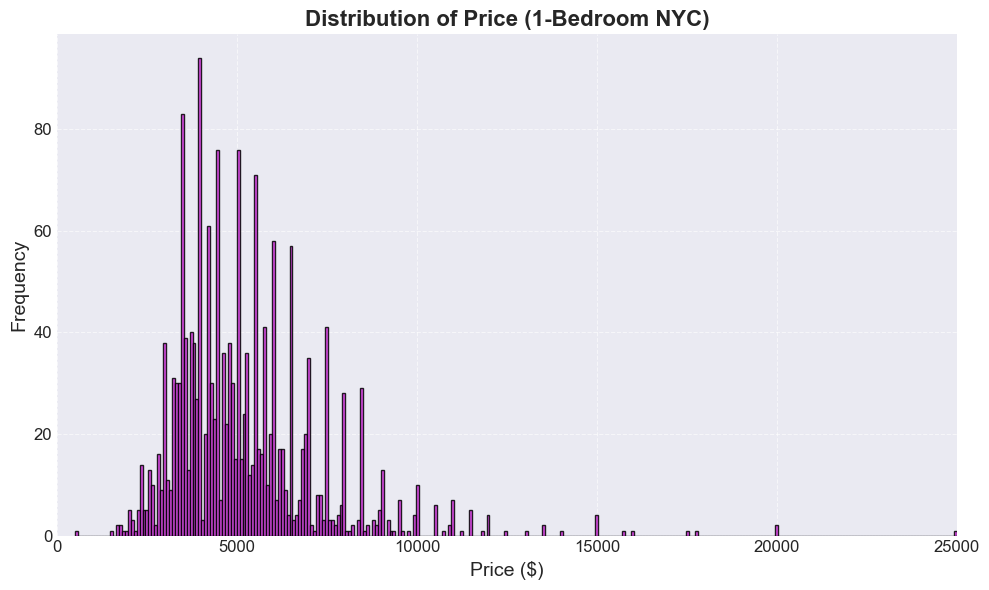

In [118]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(nycdfOneB["Price"], bins=300, color="#D633E2", edgecolor='black', alpha=0.85)
ax.set_xlim(0, 25000)
ax.set_title("Distribution of Price (1-Bedroom NYC)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Hypothesis Testing 
# We can either use parametric test or non-parametric test. There are a few assumptions for parametric tests: 1. Normality, 2. Homogeneity of variance 3. The mean is meaningful
# Here, we will use t-test and u-test to compare the means and distributions of two groups: 1-bedroom apartments in Jamaica and NYC.

# Use t-test to compare means of two groups
a = jamaicaOneBrnonan["Price"].dropna()
b = nycdfOneB["Price"].dropna()
print(a.shape, b.shape)
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)
from scipy import stats
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: means are significantly different.")
else:
    print("Fail to reject the null hypothesis: means are not significantly different.")
# This indicates that the average square footage of 1-bedroom apartments is significantly different from that of

# Use u-test to compare distributions
u_stat, p_value = stats.mannwhitneyu(a, b, alternative='two-sided')
print(f"U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: distributions are not significantly different.")

(384,) (1789,)
T-statistic: -57.33, P-value: 0.0000
Reject the null hypothesis: means are significantly different.
U-statistic: 9864.00, P-value: 0.0000
Reject the null hypothesis: distributions are significantly different.


In [ ]:
# Prophet Time Series Forecasting